## Movie_Recommendation_System_Using_Machine_Learning
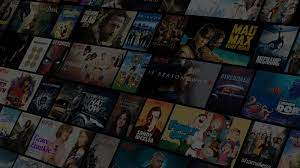

# Contents

    > Movie Dataset
    > Reading Movies Datale
    > Cleaning Data and Data Preprocessing
        Removing Unnamed Column
        Changing Data Type
    > Data Exploration using Natural Language Processing(NLP)
    > Building Model
        Using CountVectorizer
        Using NearestNeighbors


## Importing Required library's

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplt
import os




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving tmdb_5000_credits.csv to tmdb_5000_credits.csv
Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.shape

(4803, 20)

In [ ]:
credits.shape

(4803, 4)

In [ ]:
# merging the two data sets
movies = movies.merge(credits, on='title')

In [ ]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.shape

(4809, 23)

In [ ]:
#removeing the unwantted coloums in the data set

movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

## Data Preprocessing

In [ ]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [ ]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies.shape

(4809, 7)

In [ ]:
#data preprocessing
#checking missing values
#removieing the brackets for coloumns genre,keyword,cast,crew because iit was not that much use fulll for tthe recommending movies
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
#we donnot need the overview missing values simplely we can remove the 3 rows which is missing
movies.dropna(inplace=True)

In [ ]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [ ]:
movies.shape

(4806, 7)

In [ ]:
#checking dupliate values
movies.duplicated().sum()

0

In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
# we donot need str type we nedd in list  type of values


In [ ]:
#importing ast it converst the string to list and literal_eval converts the str to string
import ast

def convert(text):
    l = []
    for i in ast.literal_eval(text):

        l.append(i['name'])

    return l

In [ ]:
movies['genres'].apply(convert)

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [ ]:
movies['genres'] = movies['genres'].apply(convert)

In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
movies['keywords'] = movies['keywords'].apply(convert)

In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
# movies.iloc[0]['cast']
# i this colum there are more character and names so we take the top name of the actor in rows
def convert_cast(text):
    l = []
    counter = 0
    for  i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
    return l

In [ ]:
movies['cast'].apply(convert_cast)

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4806    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4807    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4806, dtype: object

In [ ]:
movies['cast'] = movies['cast'].apply(convert_cast)
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [ ]:
# now for crew
 # movies.iloc[0]['crew']
def director(text):
        l = []
        for i in ast.literal_eval(text):
            if  i['job'] == 'Director':
                l.append(i['name'])
                break

        return l

In [ ]:
movies['crew'].apply(director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [ ]:
movies['crew'] = movies['crew'].apply(director)

In [ ]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]


In [ ]:
# now to we have to do the overview to list to concotinate eith each other
movies['overview'] = movies['overview'].apply(lambda x:x.split())

In [ ]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]


In [ ]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [ ]:
# sam mendes to sammendes   like conversion

def space_remove(word):
    l = []
    for i in word:
        l.append(i.replace(" ",""))
    return l


In [ ]:
movies['cast'] = movies['cast'].apply(space_remove)

In [ ]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[Gore Verbinski]


In [ ]:
movies['crew'] = movies['crew'].apply(space_remove)
movies['overview'] = movies['overview'].apply(space_remove)
movies['cast'] = movies['cast'].apply(space_remove)
movies['keywords'] = movies['keywords'].apply(space_remove)

In [ ]:
movies.head(4)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan]


In [ ]:
#creating the column with concatanatng the the present columns
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."


In [ ]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez',
 'GiovanniRibisi',
 'JoelDavidMoore',
 'CCHPounder',
 'WesStudi',
 'LazAlonso',
 'DileepRao',
 'MattGerald',
 'SeanAnthonyMoran',
 'JasonWhyte',
 'ScottLawrence',
 'KellyKilgour',
 'JamesPatrickPitt',
 'SeanPatrickMurphy',
 'PeterDillon',
 'KevinDorman',
 'KelsonHenderson',
 'DavidVanHorn',
 '

In [ ]:
# now we can thhe necessaryy columns in the data
new_df = movies[['movie_id','title','tags']]
new_df.head(5)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
#now converting the tags columns list to sentences

new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

<ipython-input-85-7f586adb13b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


In [ ]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [ ]:
new_df.iloc[0]['tags']

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy Science Fiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver StephenLang MichelleRodriguez GiovanniRibisi JoelDavidMoore CCHPounder WesStudi LazAlonso DileepRao MattGerald SeanAnthonyMoran JasonWhyte ScottLawrence KellyKilgour JamesPatrickPitt SeanPatrickMurphy PeterDillon KevinDorman KelsonHenderson DavidVanHorn JacobTomuri MichaelBlain-Rozgay JonCurry LukeHawker WoodySchultz PeterMensah SoniaYee JahnelCurfman IlramChoi KylaWarren LisaRoumain DebraWilson ChrisMala TaylorKibby JodieLandau JulieLamm CullenB.Madden JosephBradyMadden FrankieTorres AustinWilson SaraWilson TamicaWashington-Miller LucyBriant Nathan

In [ ]:
new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())

<ipython-input-89-8b60b591a07f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:x.lower())


In [ ]:

new_df.iloc[0]['tags']

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy science fiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez giovanniribisi joeldavidmoore cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyte scottlawrence kellykilgour jamespatrickpitt seanpatrickmurphy peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurry lukehawker woodyschultz petermensah soniayee jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibby jodielandau julielamm cullenb.madden josephbradymadden frankietorres austinwilson sarawilson tamicawashington-miller lucybriant nathan

In [ ]:
# we have convet the data into vectorization because the machine can not under stand the direct text by using the counter vectorization
# we use here stemming operation by nltk for eg loves loved and loving it will take only the root word love it can use for picking purpose

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
def stems(text):
    l = []
    for i in text.split():

        l.append(ps.stem(i))
    return " ".join(l)

In [ ]:
new_df['tags'] = new_df['tags'].apply(stems)

<ipython-input-96-ebce1bd97223>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stems)


In [ ]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi scienc fiction cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wray

## Vectorization

In [ ]:
# now converting to counter vec....
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words = 'english') # stop word removes the in and at un meaningfull words

In [ ]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [ ]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vector.shape

(4806, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.06593805, 0.07476672, ..., 0.04129201, 0.        ,
        0.        ],
       [0.06593805, 1.        , 0.07559289, ..., 0.02087414, 0.        ,
        0.02328101],
       [0.07476672, 0.07559289, 1.        , ..., 0.02366905, 0.        ,
        0.        ],
       ...,
       [0.04129201, 0.02087414, 0.02366905, ..., 1.        , 0.04222003,
        0.0437374 ],
       [0.        , 0.        , 0.        , ..., 0.04222003, 1.        ,
        0.09417632],
       [0.        , 0.02328101, 0.        , ..., 0.0437374 , 0.09417632,
        1.        ]])

In [ ]:
similarity.shape

(4806, 4806)

In [ ]:
# finding index
new_df[new_df['title'] == 'Spider-Man'].index[0]

159

In [ ]:
# difing the fun for recommending movies
# distance is measure similarty b/w the movies

def recommend(movie):
    index = new_df[new_df['title'] == movie].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True , key = lambda x:x[1])
    for i in distance[1:10]:   # how many similar movies u want to
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Spider-Man')

Spider-Man 3
Spider-Man 2
The Amazing Spider-Man 2
Arachnophobia
The Amazing Spider-Man
Kick-Ass
X-Men
Evil Dead II
21 Jump Street


In [ ]:
recommend('The Dark Knight Rises')

The Dark Knight
Batman Begins
Batman Returns
Batman
Batman Forever
Batman
Batman & Robin
Nighthawks
Slow Burn


In [ ]:
#import pickle

#pickle.dump(new_df, open('movie_list.pkl', 'wb'))
#pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [ ]:
# now this used for addinng to web application
